In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

np.warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv('D:/py/happiness/Worldwide Vaccine Data.csv')
happiness = pd.read_csv('D:/py/happiness/world-happiness-report-2021.csv')

# Data Cleaning

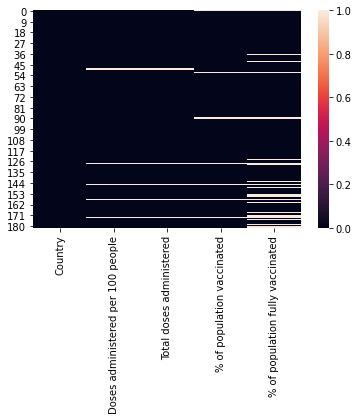

In [3]:
sns.heatmap(covid.isnull())
plt.show()

In [4]:
covid.describe()

,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
count,177.000000,1.770000e+02,175.000000,160.000000
mean,36.101130,1.715095e+07,22.429714,14.520000
std,36.934697,9.851431e+07,21.438917,16.179838
min,0.100000,7.462000e+03,0.100000,0.000000
25%,4.300000,1.970010e+05,3.300000,1.200000
50%,23.000000,1.149608e+06,15.000000,7.600000
75%,63.000000,5.365803e+06,38.000000,26.000000
max,156.000000,1.225734e+09,72.000000,63.000000


In [5]:
covid.fillna(0, inplace=True)

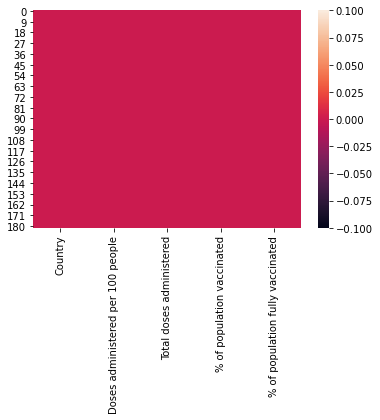

In [6]:
sns.heatmap(covid.isnull())
plt.show()

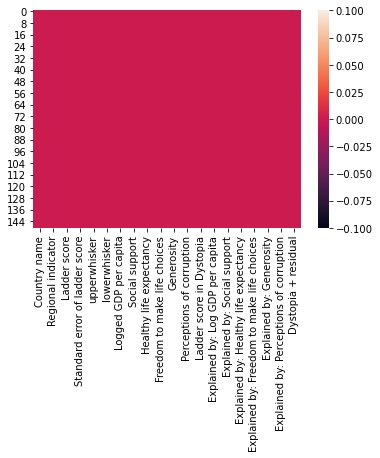

In [7]:
sns.heatmap(happiness.isnull())
plt.show()

In [8]:
display(covid[covid['Country']=='U.K.'])

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated
6,U.K.,116.0,77303533.0,67.0,49.0


In [9]:
covid.loc[6,'Country'] = 'United Kingdom'

In [10]:
df = covid.merge(happiness, left_on='Country', right_on='Country name', how='inner')

In [11]:
df

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Malta,131.0,659488.0,71.0,63.0,Malta,Western Europe,6.602,0.044,6.688,...,0.133,0.653,2.43,1.411,1.055,0.747,0.664,0.275,0.183,2.268
1,Bahrain,129.0,2116497.0,64.0,60.0,Bahrain,Middle East and North Africa,6.647,0.068,6.779,...,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
2,Israel,119.0,10749083.0,62.0,57.0,Israel,Middle East and North Africa,7.157,0.034,7.224,...,0.031,0.753,2.43,1.376,1.074,0.788,0.509,0.208,0.119,3.083
3,Chile,119.0,22501356.0,66.0,55.0,Chile,Latin America and Caribbean,6.172,0.046,6.262,...,-0.044,0.830,2.43,1.200,0.946,0.678,0.438,0.159,0.070,2.682
4,United Kingdom,116.0,77303533.0,67.0,49.0,United Kingdom,Western Europe,7.064,0.038,7.138,...,0.233,0.459,2.43,1.423,1.062,0.757,0.580,0.340,0.306,2.596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Turkmenistan,0.0,0.0,0.0,0.0,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,...,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
132,Cameroon,0.4,110324.0,0.3,0.1,Cameroon,Sub-Saharan Africa,5.142,0.074,5.288,...,0.026,0.848,2.43,0.543,0.556,0.159,0.425,0.205,0.058,3.195
133,Benin,0.4,46108.0,0.3,0.1,Benin,Sub-Saharan Africa,5.045,0.073,5.189,...,-0.034,0.661,2.43,0.507,0.058,0.196,0.457,0.166,0.178,3.482
134,Burkina Faso,0.1,25833.0,0.1,0.0,Burkina Faso,Sub-Saharan Africa,4.834,0.081,4.993,...,-0.009,0.748,2.43,0.364,0.472,0.179,0.381,0.182,0.122,3.133


In [12]:
del df['Country name']

In [13]:
df = df.sort_values(by=['Country'])

In [14]:
df

,Country,Doses administered per 100 people,Total doses administered,% of population vaccinated,% of population fully vaccinated,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
114,Afghanistan,2.2,835694.0,1.7,0.5,South Asia,2.523,0.038,2.596,2.449,...,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
58,Albania,33.0,943439.0,19.0,14.0,Central and Eastern Europe,5.117,0.059,5.234,5.001,...,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
93,Algeria,5.8,2500000.0,5.8,0.0,Middle East and North Africa,4.887,0.053,4.991,4.783,...,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
48,Argentina,45.0,20221697.0,36.0,8.9,Latin America and Caribbean,5.929,0.056,6.040,5.819,...,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
115,Armenia,2.2,64293.0,1.8,0.4,Commonwealth of Independent States,5.283,0.058,5.397,5.168,...,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Venezuela,5.1,1466988.0,4.3,0.8,Latin America and Caribbean,4.892,0.064,5.017,4.767,...,-0.169,0.827,2.43,0.852,0.897,0.574,0.284,0.078,0.072,2.135
106,Vietnam,3.7,3593970.0,3.5,0.2,Southeast Asia,5.411,0.039,5.488,5.334,...,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
127,Yemen,0.9,268753.0,0.9,0.0,Middle East and North Africa,3.658,0.070,3.794,3.521,...,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776
129,Zambia,0.8,151205.0,0.8,0.1,Sub-Saharan Africa,4.073,0.069,4.209,3.938,...,0.061,0.823,2.43,0.528,0.552,0.231,0.487,0.227,0.074,1.975


# Descriptive Analysis

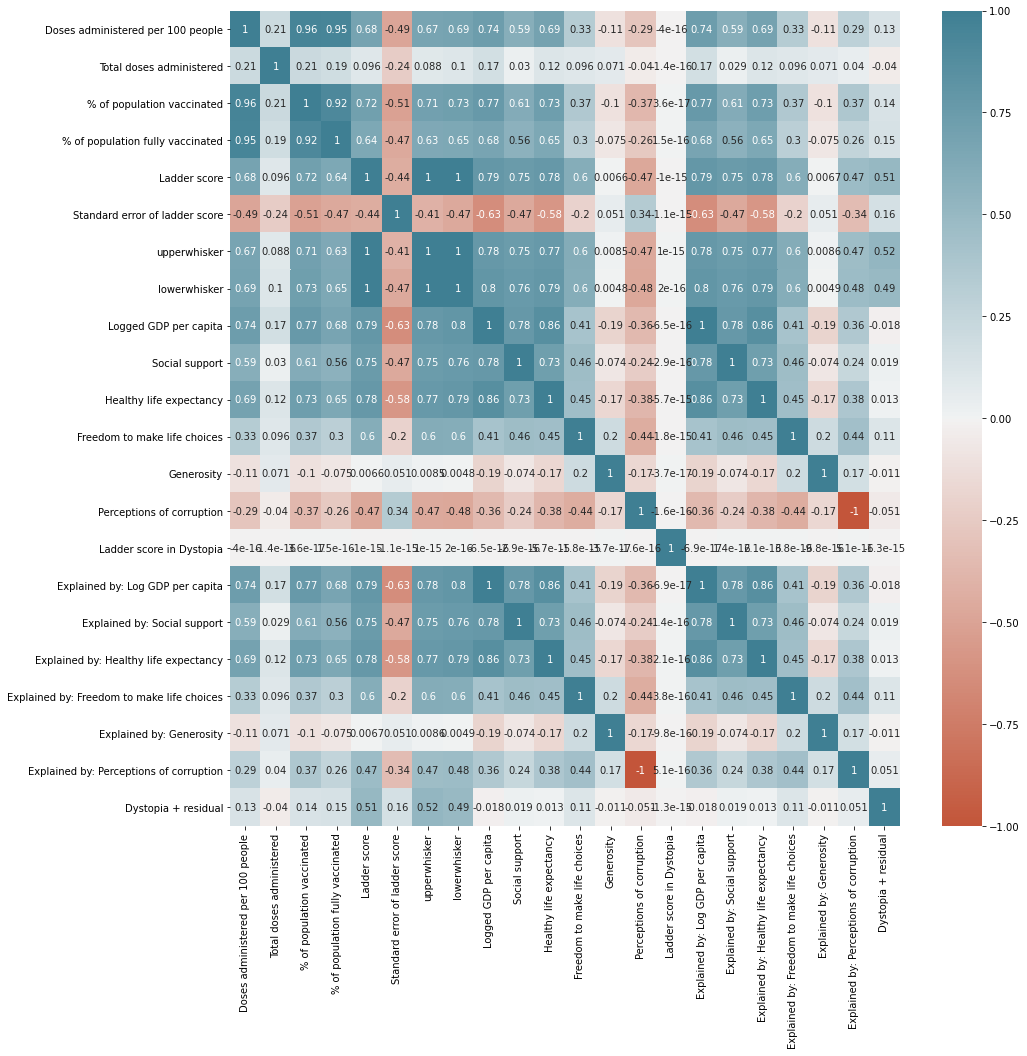

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

plt.show()

In [16]:
required = ['Country','Regional indicator', '% of population vaccinated', '% of population fully vaccinated', 
            'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy']

In [17]:
df = df[required]
df

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
114,Afghanistan,South Asia,1.7,0.5,2.523,7.695,0.463,52.493
58,Albania,Central and Eastern Europe,19.0,14.0,5.117,9.520,0.697,68.999
93,Algeria,Middle East and North Africa,5.8,0.0,4.887,9.342,0.802,66.005
48,Argentina,Latin America and Caribbean,36.0,8.9,5.929,9.962,0.898,69.000
115,Armenia,Commonwealth of Independent States,1.8,0.4,5.283,9.487,0.799,67.055
...,...,...,...,...,...,...,...,...
98,Venezuela,Latin America and Caribbean,4.3,0.8,4.892,9.073,0.861,66.700
106,Vietnam,Southeast Asia,3.5,0.2,5.411,8.973,0.850,68.034
127,Yemen,Middle East and North Africa,0.9,0.0,3.658,7.578,0.832,57.122
129,Zambia,Sub-Saharan Africa,0.8,0.1,4.073,8.145,0.708,55.809


In [18]:
df[list(df.select_dtypes('object').columns)]

,Country,Regional indicator
114,Afghanistan,South Asia
58,Albania,Central and Eastern Europe
93,Algeria,Middle East and North Africa
48,Argentina,Latin America and Caribbean
115,Armenia,Commonwealth of Independent States
...,...,...
98,Venezuela,Latin America and Caribbean
106,Vietnam,Southeast Asia
127,Yemen,Middle East and North Africa
129,Zambia,Sub-Saharan Africa


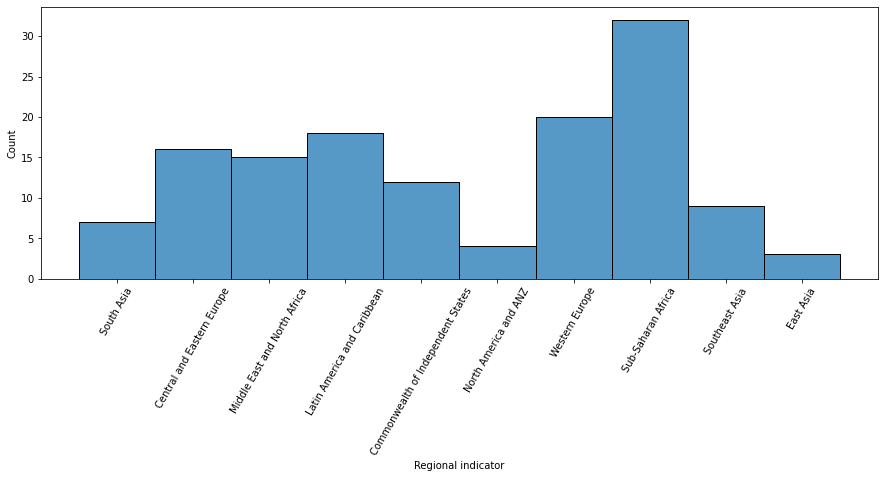

In [19]:
plt.subplots(figsize=(15,5))
plot = sns.histplot(df, x='Regional indicator')
plt.setp(plot.get_xticklabels(), rotation=60)
plt.show()

In [52]:
display(df['Regional indicator'].value_counts())

Sub-Saharan Africa                    32
Western Europe                        20
Latin America and Caribbean           18
Central and Eastern Europe            16
Middle East and North Africa          15
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
North America and ANZ                  4
East Asia                              3
Name: Regional indicator, dtype: int64

In [21]:
numbers = list(df.select_dtypes('float64').columns)

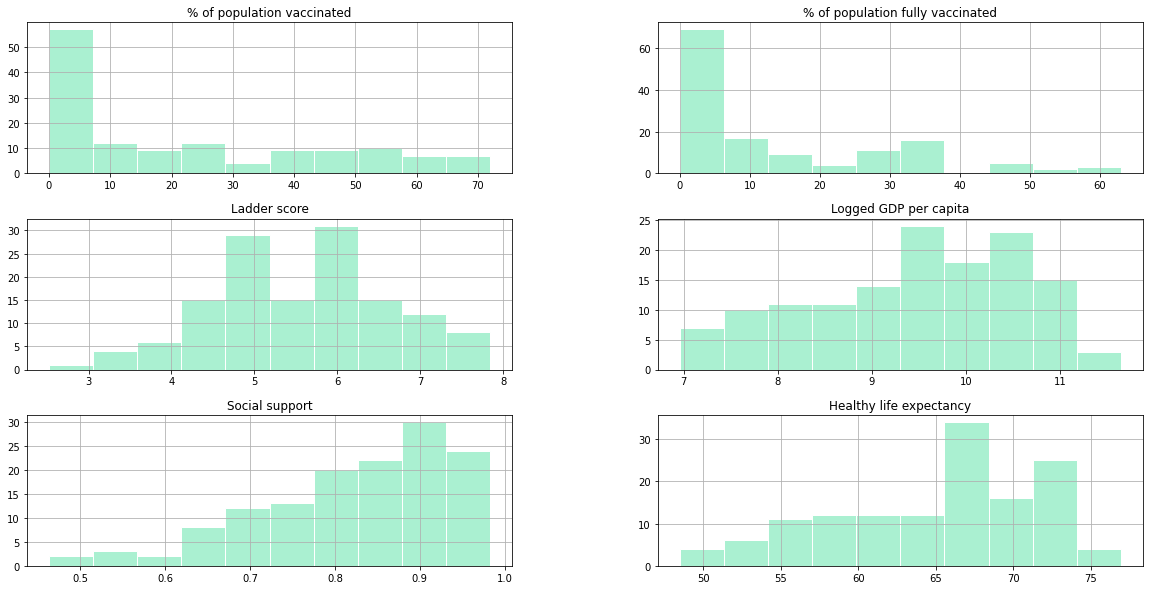

,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,22.655147,14.050735,5.572051,9.451610,0.820221,65.135037
std,22.381731,16.468736,1.070098,1.132061,0.112610,6.650741
min,0.000000,0.000000,2.523000,6.958000,0.463000,48.478000
25%,3.150000,0.675000,4.869750,8.548750,0.750000,60.427750
50%,14.000000,6.000000,5.617000,9.573000,0.839500,66.700500
75%,41.250000,28.250000,6.268500,10.391750,0.910750,69.664500
max,72.000000,63.000000,7.842000,11.647000,0.983000,76.953000


In [22]:
df[numbers].hist(figsize=(20,10), color='#aaf0d1', edgecolor='white')

plt.show()

df[numbers].describe()

# What regions have most of its population vaccinated?

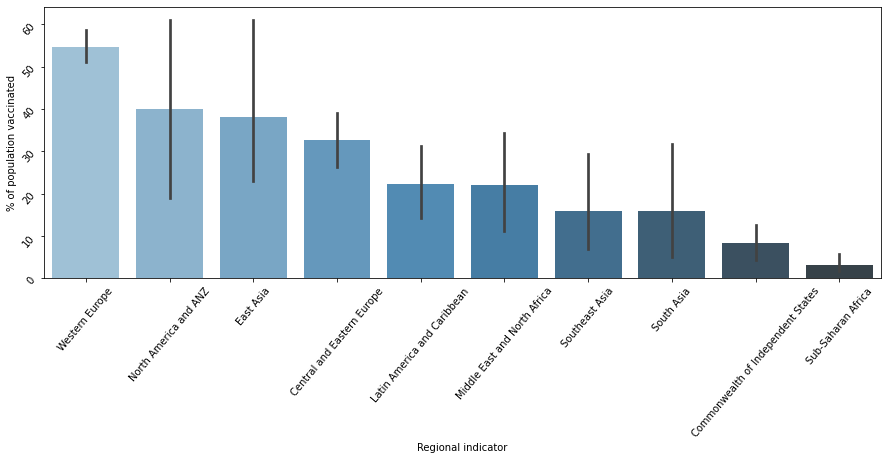

Regional indicator
Western Europe                        54.600000
North America and ANZ                 40.000000
East Asia                             38.000000
Central and Eastern Europe            32.693750
Latin America and Caribbean           22.283333
Middle East and North Africa          22.060000
Southeast Asia                        15.922222
South Asia                            15.914286
Commonwealth of Independent States     8.333333
Sub-Saharan Africa                     3.290625
Name: % of population vaccinated, dtype: float64


In [23]:
fig, ax =plt.subplots(figsize=(15,5))

order=list(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False).index)

sns.barplot(x='Regional indicator', y='% of population vaccinated',order = order, data=df, palette="Blues_d")

ax.tick_params(labelrotation=50)

plt.show()

print(df.groupby('Regional indicator')['% of population vaccinated'].mean().sort_values(ascending=False))

In [24]:
df[df['Regional indicator']=='North America and ANZ']

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
59,Australia,North America and ANZ,24.0,5.8,7.183,10.796,0.940,73.9
10,Canada,North America and ANZ,68.0,30.0,7.103,10.776,0.926,73.8
68,New Zealand,North America and ANZ,14.0,9.0,7.277,10.643,0.948,73.4
9,United States,North America and ANZ,54.0,46.0,6.951,11.023,0.920,68.2


# higher GDP mean a higher vaccinated?

In [25]:
X = df.loc[:,'Logged GDP per capita'].values.reshape(-1,1)

In [26]:
#clustering

kmeans = KMeans(n_clusters=3, n_init = 3, init = "random", random_state = 42)
kmeans.fit(X)

KMeans(init='random', n_clusters=3, n_init=3, random_state=42)

In [27]:
df['GDP_Cluster'] = kmeans.labels_

In [28]:
df['GDP_Cluster'] = df['GDP_Cluster'].astype(str)
df['GDP_Cluster']

114    0
58     1
93     1
48     1
115    1
      ..
98     1
106    1
127    0
129    0
84     0
Name: GDP_Cluster, Length: 136, dtype: object

In [29]:
Mmap = {'0': 'Low GDP', '1':'Medium GDP', '2':'High GDP'}
df['GDP_Cluster'] = df['GDP_Cluster'].map(Mmap)

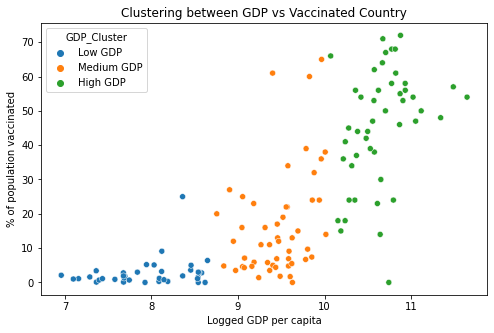

,average % of population vaccinated
GDP_Cluster,
Low GDP,2.726316
Medium GDP,16.401961
High GDP,45.553191


In [30]:
plt.subplots(figsize=(8,5))
sns.scatterplot(data=df, x='Logged GDP per capita',y='% of population vaccinated',hue="GDP_Cluster")
plt.title("Clustering between GDP vs Vaccinated Country")
plt.show()

gdp = df.groupby('GDP_Cluster')['% of population vaccinated'].mean().sort_values()
gdp = pd.DataFrame(gdp)
gdp = gdp.rename(columns={'% of population vaccinated': 'average % of population vaccinated'})
display(gdp)

In [46]:
display(df[(df['GDP_Cluster']=='High GDP') & (df['% of population vaccinated']<10)])

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,GDP_Cluster
43,Saudi Arabia,Middle East and North Africa,0.0,0.0,6.494,10.743,0.891,66.603,High GDP


In [45]:
display(df[(df['GDP_Cluster']=='Medium GDP') & (df['% of population vaccinated']>62)])

,Country,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,GDP_Cluster
6,Uruguay,Latin America and Caribbean,65.0,47.0,6.431,9.966,0.925,69.1,Medium GDP


As we can see Saudi arabia have High GDP but less vaccinated population. On the other hand Uruguay have less GDP but have vaccinated population among Highest GDP countries.

# What makes these two cases so special??

we are going to calculate the data of high income countries and compare it with Uruguay and Saudi Arabia. We are also going to compare the data of these two countries with the data of the countries in their region.

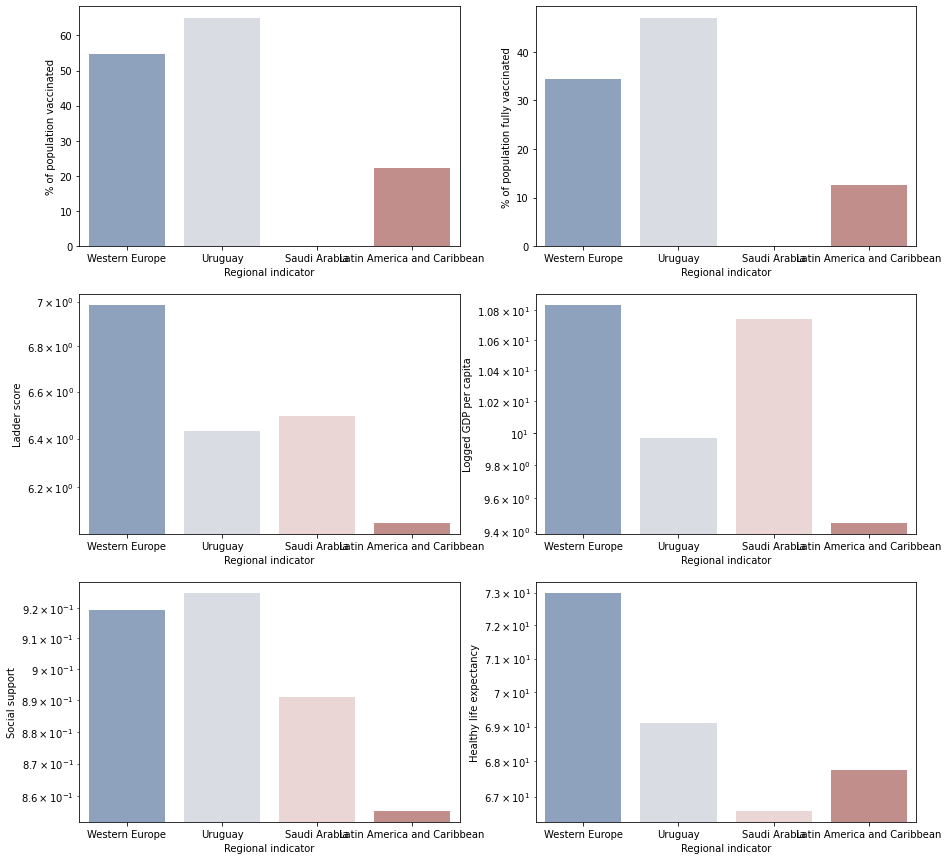

,Regional indicator,% of population vaccinated,% of population fully vaccinated,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy
0,Western Europe,54.600000,34.400000,6.983850,10.835050,0.919200,72.989850
6,Uruguay,65.000000,47.000000,6.431000,9.966000,0.925000,69.100000
43,Saudi Arabia,0.000000,0.000000,6.494000,10.743000,0.891000,66.603000
0,Latin America and Caribbean,22.283333,12.516667,6.055611,9.451167,0.855389,67.762167


In [49]:
europe = df['Regional indicator'] == "Western Europe"
europe2 = df[europe]
europe2 = europe2.groupby('Regional indicator')[list(europe2.keys()[2:-1])].mean().reset_index()

latin = df['Regional indicator'] == "Latin America and Caribbean"
latin2 = df[latin]
latin2 = latin2.groupby('Regional indicator')[list(latin2.keys()[2:-1])].mean().reset_index()

uruguay = df['Country'] == "Uruguay"
uruguay2 = df[uruguay]
del uruguay2['Regional indicator']
uruguay2 = uruguay2.rename(columns={'Country':'Regional indicator'})
uruguay2 = uruguay2.iloc[:,:-1]

saudi = df['Country'] == "Saudi Arabia"
saudi2 = df[saudi]
del saudi2['Regional indicator']
saudi2 = saudi2.rename(columns={'Country':'Regional indicator'})
saudi2 = saudi2.iloc[:,:-1]

special = pd.concat([europe2, uruguay2, saudi2, latin2], axis= 0)

fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.barplot(x='Regional indicator', y='% of population vaccinated', data=special, ax=ax[0,0], palette="vlag")
sns.barplot(x='Regional indicator', y='% of population fully vaccinated', data=special, ax=ax[0,1], palette="vlag")
sns.barplot(x='Regional indicator', y='Ladder score', data=special, ax=ax[1,0], palette="vlag")
ax[1,0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Logged GDP per capita', data=special, ax=ax[1,1], palette="vlag")
ax[1,1].set_yscale("log")
sns.barplot(x='Regional indicator', y='Social support', data=special, ax=ax[2,0], palette="vlag")
ax[2,0].set_yscale("log")
sns.barplot(x='Regional indicator', y='Healthy life expectancy', data=special, ax=ax[2,1], palette="vlag")
ax[2,1].set_yscale("log")


plt.show()
display(special)

Uruguay: 
        We can tell from the graphs and table that Uruguay is doing well in the vaccination process, even better than the average of Western Europe and way more than the its region, Latin America and the caribbean. Important to remark that Uruguay dont have a higher GDP than the average of Western Union. But, if we keep examining the graphs, we see that Uruguay has an outstanding social suuport. A couple of hypothesis then come to my mind.

Is Uruguay doing better than europe and latin america because the importance they put on social support?
Is Western Union doing worst because they level of cooperation en distribution? this could also explain why Uruguay is so far from the latin america average, since the level of cooperation in this region is quite low.


Saudi Arabia: 
             Saudi Arabia is more of a special case than Uruguay. The contry has decent numbers in all of its indicadors. But, they still don't have any vaccinated person.

To answer this question i had to further research in the internet and found that Saudi Arabia has over 53% of its population vaccinated. The error goes back when I replaced the nulls with 0s. 

The data about Saudi Arabia is not available and is discarted from the analysis.

# Social support and Healthy life expectany influence % of vaccinated people?

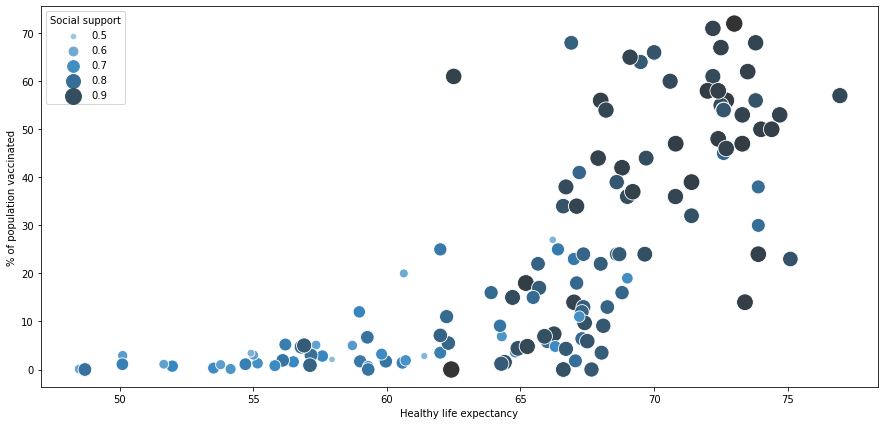

In [50]:
fig, ax = plt.subplots(figsize=(15,7))

sns.scatterplot(x='Healthy life expectancy', y='% of population vaccinated', data=df, 
                hue='Social support',palette="Blues_d", 
                size='Social support', sizes=(0.3, 300))

plt.show()

This graph tells us the positive relation between the healthy life and social support, % of vaccinated peoples. 

#  a vaccinated country a happy country?

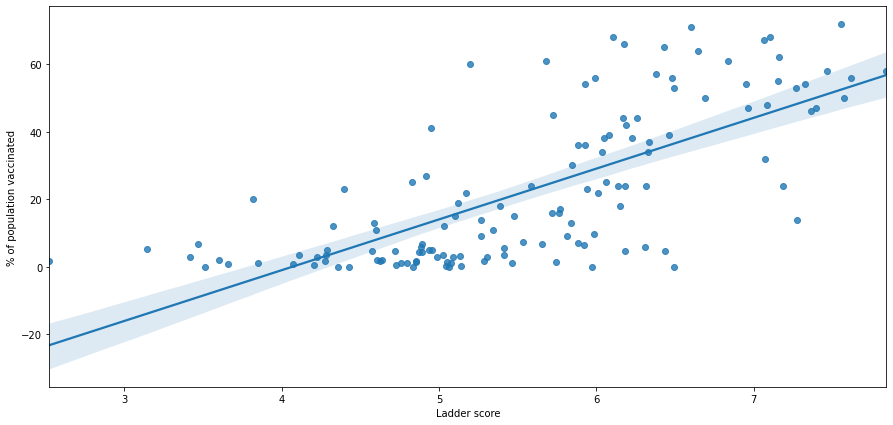

In [53]:
fig, ax = plt.subplots(figsize=(15,7))
sns.regplot(x="Ladder score", y="% of population vaccinated", data=df)

plt.show()

This shows the happier the country is, the more people will get vaccinated. A happiness of a country a based on many other factors like economic factors. This is merely an example but, that doesn't take out the fact that a happier country is vaccinated one.

# Conclusions

Countries in their regions have different vaccination stage, which means that there's no evidence of cooperation between countries in their regions, this phenomenon is explained with the variance of the mean in region wise % of vaccination plot. Thats not the case for Western Europe, where the countries have a similar % of vaccinated population.

The trend in gdp vs vaccination shows that the % of vaccinated population is directly related to the GDP of a country: the higher the GDP the higher the % of vaccinated population. This is not the case of Uruguay, since they are a medium level GDP but have a higher % of vaccinated population. This could be explained with the emphasis the country have on social support, factor that is higher than almost all of the high GDP countries.

A happy country is a vaccinated one. But do not rush with a direct conclusion. A happy country is the result of a combination of economic and social factors that usually make a developed country. Then, i would rather say that a developed country is a vaccinated one.